In [1]:
!pip install pandas numpy seaborn matplotlib sklearn

try:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    print("Please install required packages using pip:")
    print("pip install pandas numpy seaborn matplotlib")


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df.shape

(1000, 16)

In [6]:
sns.set(style="whitegrid")

In [7]:
df.isna().sum().sum()

91

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
import warnings 
warnings.filterwarnings('ignore')

In [12]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [13]:
df.describe(include='object').columns

Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

In [14]:
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

In [15]:
for col in categorical_cols:
    print(f"Value counts for {col}: \n {df[col].value_counts()}")

Value counts for gender: 
 gender
Male      440
Female    433
Other      36
Name: count, dtype: int64
Value counts for part_time_job: 
 part_time_job
No     713
Yes    196
Name: count, dtype: int64
Value counts for diet_quality: 
 diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64
Value counts for parental_education_level: 
 parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
Value counts for internet_quality: 
 internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64
Value counts for extracurricular_participation: 
 extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64


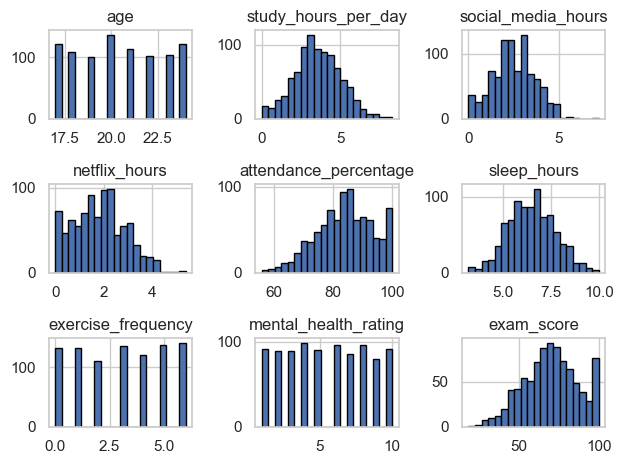

In [16]:
df.hist(bins=20, edgecolor="black")
plt.tight_layout()
plt.show()


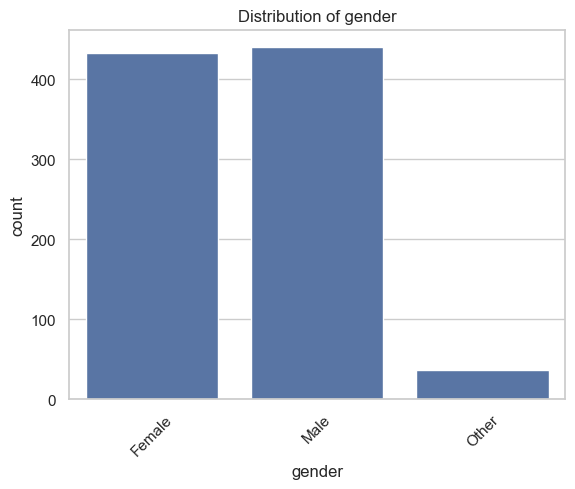

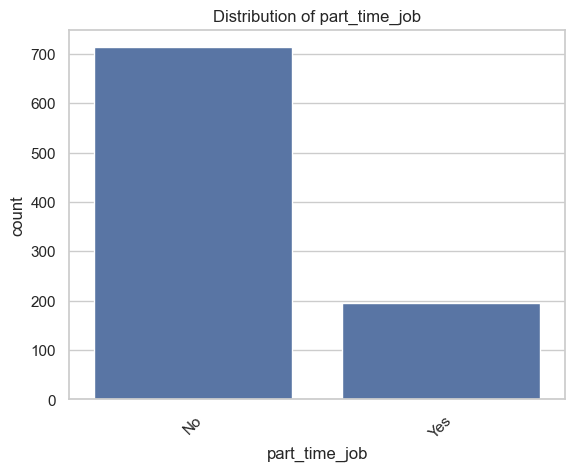

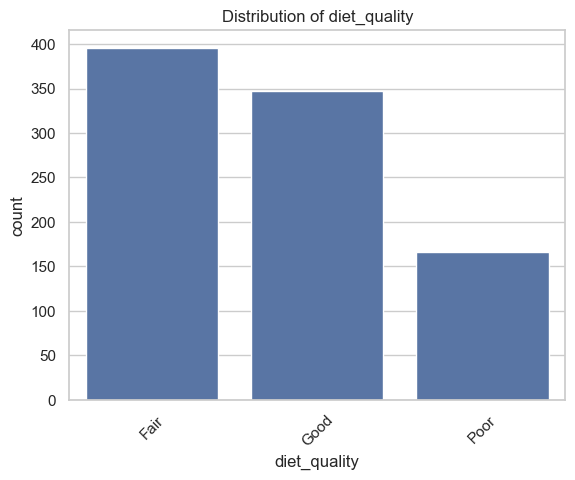

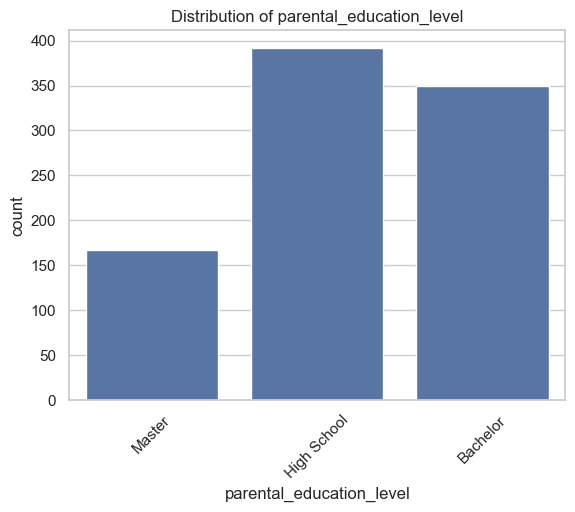

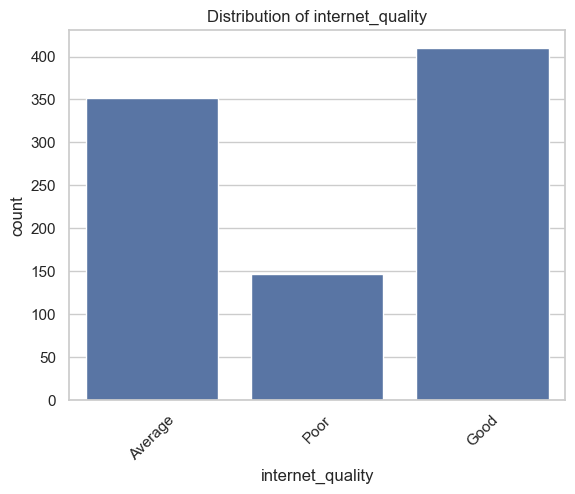

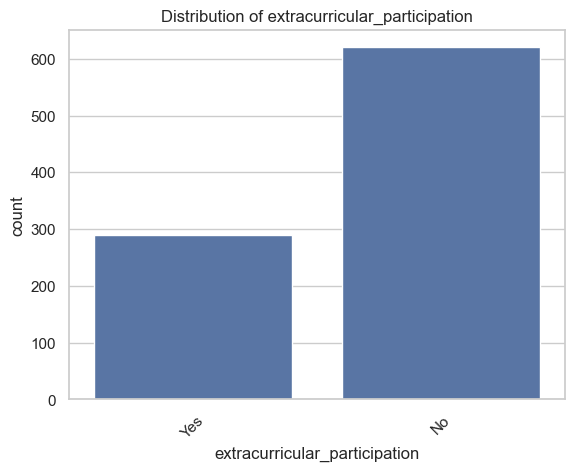

In [17]:
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

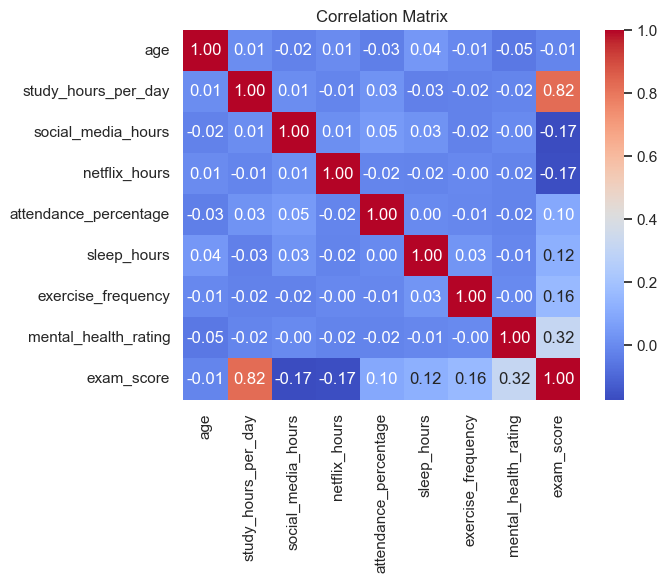

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [19]:
df.describe().columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [20]:
num_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating']

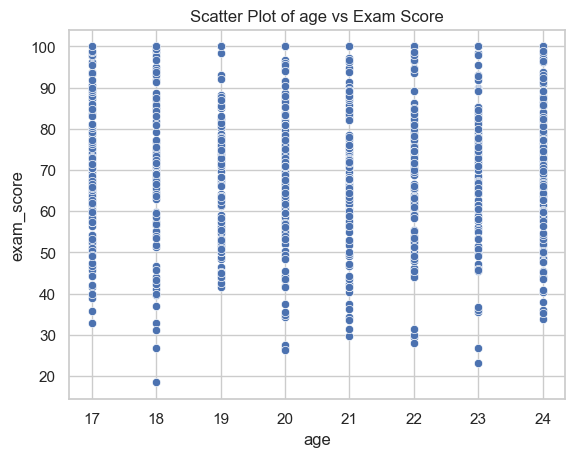

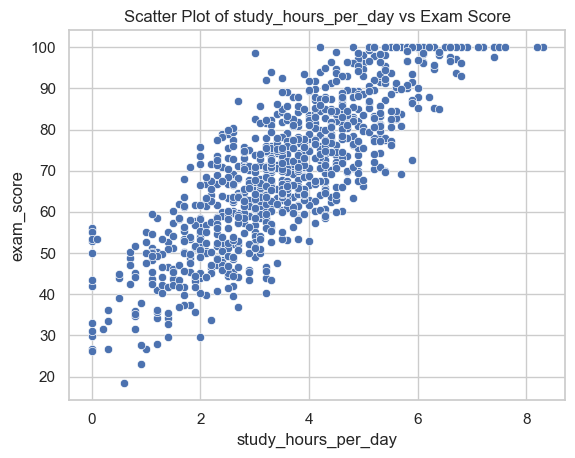

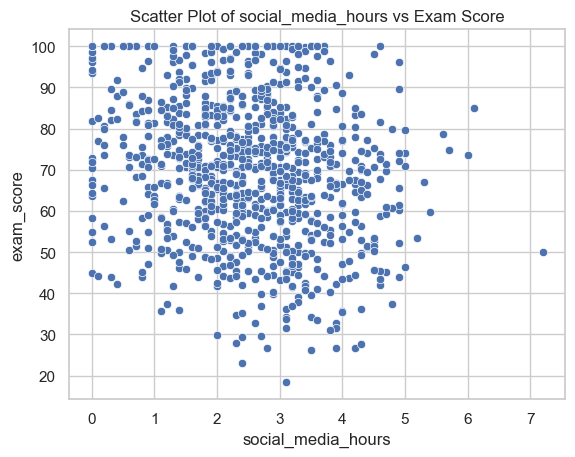

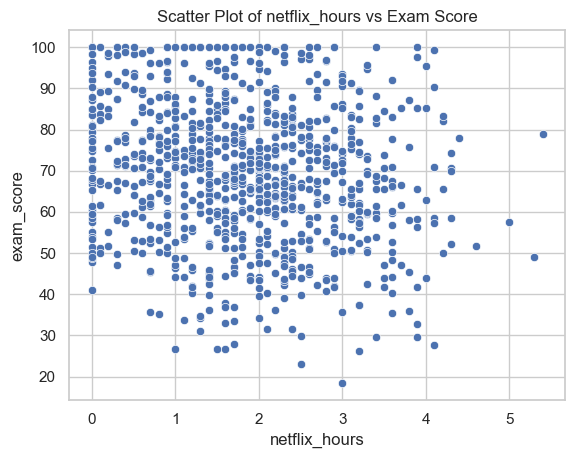

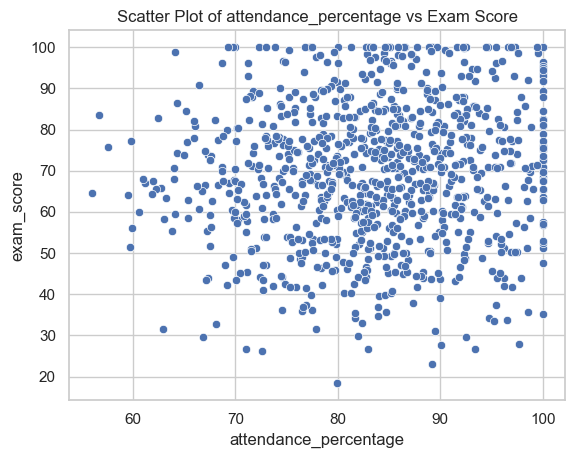

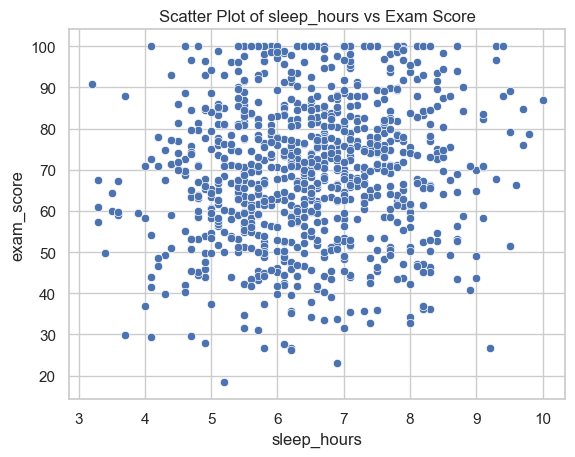

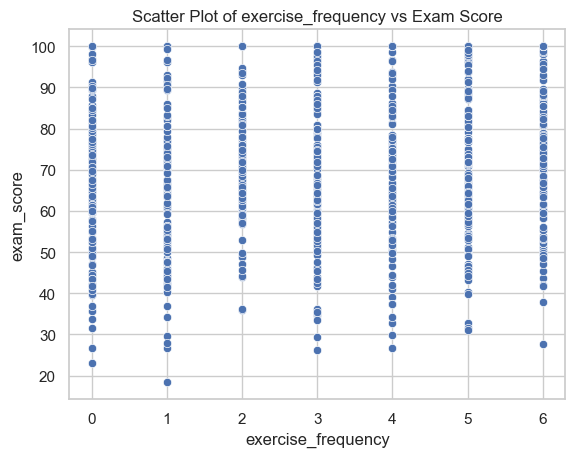

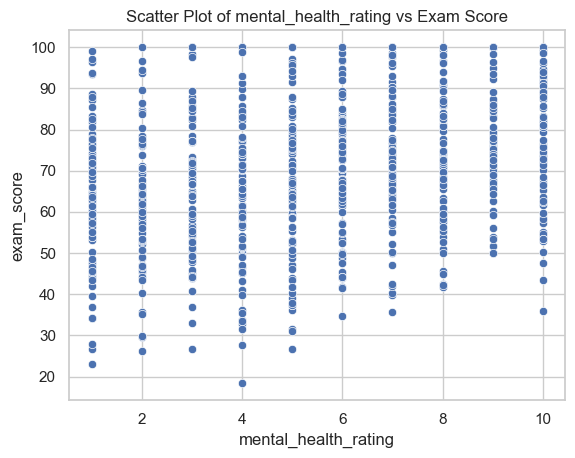

In [21]:
for feature in num_features:
    sns.scatterplot(data=df, x=feature, y="exam_score")
    plt.title(f"Scatter Plot of {feature} vs Exam Score")
    plt.show()


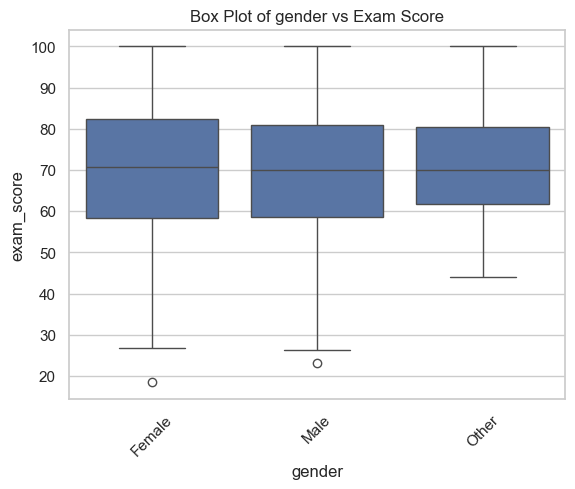

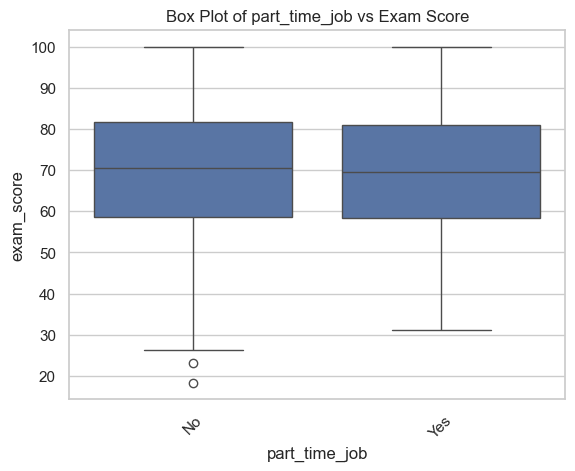

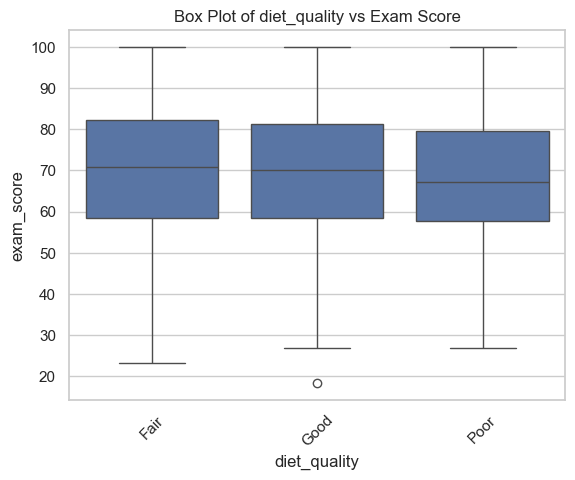

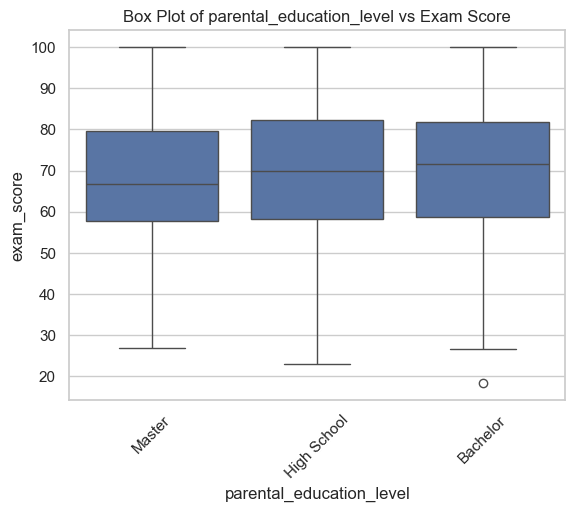

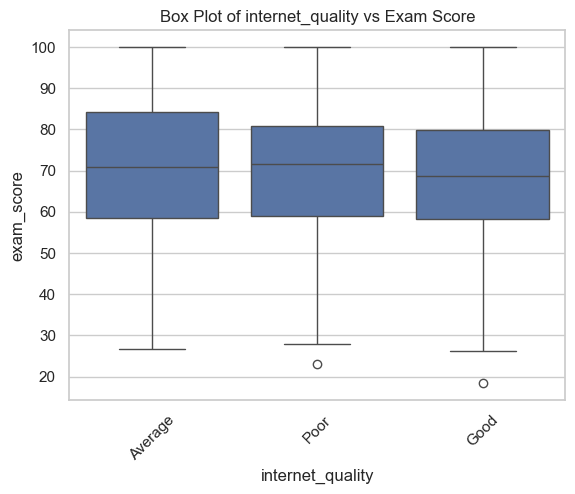

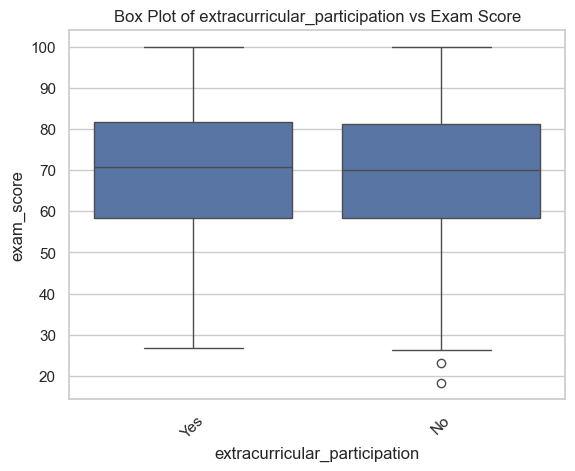

In [22]:
for col in categorical_cols:
    sns.boxplot(data=df,x=col, y="exam_score")
    plt.title(f"Box Plot of {col} vs Exam Score")
    plt.xticks(rotation=45)
    plt.show()

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [24]:
df.head(2)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0


In [25]:
features = ['study_hours_per_day','attendance_percentage', 'mental_health_rating', 'sleep_hours', 'part_time_job']

In [ ]:
target = "exam_score"

In [27]:
df_model = df[features + [target]].copy()

In [28]:
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,No,56.2
1,6.9,97.3,8,4.6,No,100.0
2,1.4,94.8,1,8.0,No,34.3
3,1.0,71.0,1,9.2,No,26.8
4,5.0,90.9,1,4.9,No,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,No,76.1
996,2.9,86.0,6,6.8,Yes,65.9
997,3.0,61.9,9,6.5,No,64.4
998,5.4,100.0,1,7.6,Yes,69.7


In [29]:
le = LabelEncoder()

In [31]:
df_model["part_time_job"] = le.fit_transform(df_model["part_time_job"])

In [32]:
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,0,56.2
1,6.9,97.3,8,4.6,0,100.0
2,1.4,94.8,1,8.0,0,34.3
3,1.0,71.0,1,9.2,0,26.8
4,5.0,90.9,1,4.9,0,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,0,76.1
996,2.9,86.0,6,6.8,1,65.9
997,3.0,61.9,9,6.5,0,64.4
998,5.4,100.0,1,7.6,1,69.7


In [ ]:
X = df_model[features]
y = df_model[target]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
len(y_test)

182

In [36]:
len(y_train)

727

In [37]:
models = {
    "LinearRegression":{
        "model":LinearRegression(),
        "params":{}
    },
    "DecisionTree":{
        "model": DecisionTreeRegressor(),
        "params":{
            "max_depth": [3,5,10],
            "min_samples_split": [2,5]
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params":{
            "n_estimators": [50,100],
            "max_depth": [5,10]
        }
    }
}

In [38]:
best_models = []

In [39]:
for name , config in models.items():
    print(f"Training {name}")

    grid = GridSearchCV(config["model"],config["params"], cv=5, scoring="neg_mean_squared_error")
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    best_models.append({
        "model": name,
        "best_params": grid.best_params_,
        "rmse": rmse,
        "r2": r2,
    })


Training LinearRegression
Training DecisionTree
Training RandomForest


In [40]:
best_models

[{'model': 'LinearRegression',
  'best_params': {},
  'rmse': 7.360190271286098,
  'r2': 0.8211026266639261},
 {'model': 'DecisionTree',
  'best_params': {'max_depth': 5, 'min_samples_split': 5},
  'rmse': 8.941700580179962,
  'r2': 0.7359621869019315},
 {'model': 'RandomForest',
  'best_params': {'max_depth': 5, 'n_estimators': 100},
  'rmse': 7.996016568724086,
  'r2': 0.7888586706370777}]

In [41]:
results_df = pd.DataFrame(best_models)

In [43]:
results_df.sort_values(by="rmse")

,model,best_params,rmse,r2
0,LinearRegression,{},7.360190,0.821103
2,RandomForest,"{'max_depth': 5, 'n_estimators': 100}",7.996017,0.788859
1,DecisionTree,"{'max_depth': 5, 'min_samples_split': 5}",8.941701,0.735962


In [44]:
import joblib

best_row = results_df.sort_values(by="rmse").iloc[0]
 

In [45]:
best_row

model          LinearRegression
best_params                  {}
rmse                    7.36019
r2                     0.821103
Name: 0, dtype: object

In [47]:
best_model_name = best_row["model"]
best_model_name

'LinearRegression'

In [48]:
best_model_config = models[best_model_name]
best_model_config

{'model': LinearRegression(), 'params': {}}

In [49]:
final_model = best_model_config["model"]

In [50]:
final_model.fit(X,y)

LinearRegression()

In [51]:
final_model.predict(X_test)

array([107.4516993 ,  77.28506823,  77.22484193,  89.69195799,
        66.33382306,  83.76282292,  68.30053395,  76.53481528,
        62.33964812,  44.07751614,  62.07233324,  72.57702506,
        59.74918922,  80.04701348,  58.66801363,  52.00021266,
        91.82549796,  61.81291391,  69.53796476,  82.66920556,
        69.19275373,  92.59169846,  77.1562697 ,  44.00956087,
        62.66539553,  71.9069882 ,  65.73770789,  71.53255701,
        71.10976502,  68.8414418 ,  53.21270007,  46.98667506,
        69.13935515,  64.94639018,  59.38276315,  63.04843369,
        53.07774872,  46.7757078 , 103.39848608,  76.36598796,
       102.05443373,  69.14617842,  65.54214455,  77.0077602 ,
        66.01137447,  94.31676369, 105.61559246,  66.75598134,
        76.45016176,  57.96780871,  60.29610803, 105.01596237,
        44.84571488,  69.35389946,  85.05701304,  53.7393235 ,
        76.62284649,  59.41323383,  85.05249299,  63.63790671,
        63.74550402,  89.8219083 ,  63.24170396,  81.34

In [52]:
joblib.dump(final_model, "best_model.pkl")

['best_model.pkl']

In [53]:
joblib.load("best_model.pkl").predict(X_test)

array([107.4516993 ,  77.28506823,  77.22484193,  89.69195799,
        66.33382306,  83.76282292,  68.30053395,  76.53481528,
        62.33964812,  44.07751614,  62.07233324,  72.57702506,
        59.74918922,  80.04701348,  58.66801363,  52.00021266,
        91.82549796,  61.81291391,  69.53796476,  82.66920556,
        69.19275373,  92.59169846,  77.1562697 ,  44.00956087,
        62.66539553,  71.9069882 ,  65.73770789,  71.53255701,
        71.10976502,  68.8414418 ,  53.21270007,  46.98667506,
        69.13935515,  64.94639018,  59.38276315,  63.04843369,
        53.07774872,  46.7757078 , 103.39848608,  76.36598796,
       102.05443373,  69.14617842,  65.54214455,  77.0077602 ,
        66.01137447,  94.31676369, 105.61559246,  66.75598134,
        76.45016176,  57.96780871,  60.29610803, 105.01596237,
        44.84571488,  69.35389946,  85.05701304,  53.7393235 ,
        76.62284649,  59.41323383,  85.05249299,  63.63790671,
        63.74550402,  89.8219083 ,  63.24170396,  81.34